<a href="https://colab.research.google.com/github/Devarsh-Patel/CECS-456-Machine-Learning-Project/blob/main/animals_Minhhanh_Tran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

2.8.0


In [ ]:

#import dataset directly from kaggle
! pip install kaggle
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
#download animal dataset
! kaggle datasets download alessiocorrado99/animals10


mkdir: cannot create directory ‘/root/.kaggle’: File exists
animals10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzip the file
! unzip animals10.zip


Archive:  animals10.zip
replace raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
batch_size = 64
img_height = 180
img_width = 180

In [ ]:
#Load data using a Keras utility
train_ds = tf.keras.utils.image_dataset_from_directory(
  'raw-img',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
 'raw-img',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


In [ ]:
#list classes
class_names = train_ds.class_names
print(class_names)

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


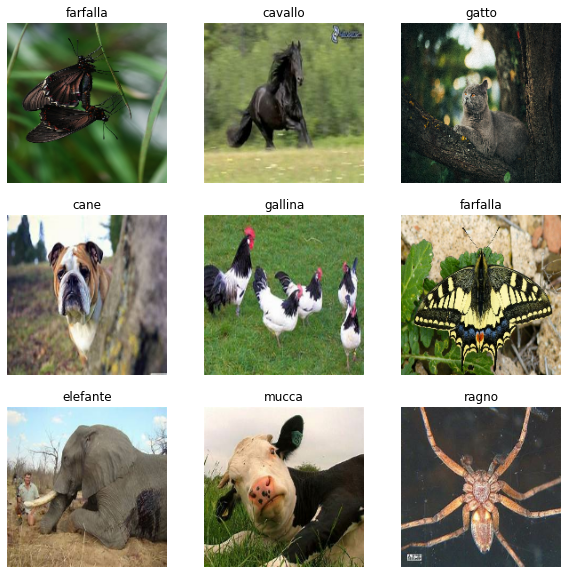

In [ ]:
#visualize data 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
# this is a batch of 32 images of shape 180x180x3
# 3 = RGB
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
# standardize the data 
normalization_layer = tf.keras.layers.Rescaling(1./255)


In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# between 0-1
print(np.min(first_image), np.max(first_image))

0.0 0.9965687


In [ ]:
num_classes = 10
# Conv2D - convolution layers
# MaxPooling2D - max pooling layers 
# Flatten - flatten the 2D tensors to allow dense to process
# Desnse - forms final output layers of NN

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  #shape is (32,180,180,3) 
  tf.keras.layers.Conv2D(32, 3, activation='relu'), #first layer is 32- 3x3 filters
  tf.keras.layers.MaxPooling2D((2,2), padding = 'same'), # pooling 2x2
  tf.keras.layers.Conv2D(64, 3, activation='relu'), # second layer is 64 - 3x3 filters
  tf.keras.layers.MaxPooling2D((2,2), padding = 'same'), # pooling 2x2
  tf.keras.layers.Conv2D(128, 3, activation='relu'), #third layer is  128 - 3x3 filters
  tf.keras.layers.MaxPooling2D((2,2), padding = 'same'), #pooling 2x2
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation= 'softmax')
])


In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])
#using sparse categorical crossentroy because Yi are integers if they were one hot encoded, we would use categorical crossentropy 

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 44, 44, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 42, 42, 128)      

In [ ]:
history = model.fit(train_ds,steps_per_epoch= 10,validation_data=val_ds, epochs=30)

Epoch 1/30
10/10 [==============================] - 107s 12s/step - loss: 2.2216 - accuracy: 0.1937 - val_loss: 2.2206 - val_accuracy: 0.1870
Epoch 2/30
10/10 [==============================] - 106s 12s/step - loss: 2.2063 - accuracy: 0.1937 - val_loss: 2.1774 - val_accuracy: 0.2258
Epoch 3/30
10/10 [==============================] - 105s 11s/step - loss: 2.1975 - accuracy: 0.1937 - val_loss: 2.1820 - val_accuracy: 0.1983
Epoch 4/30
10/10 [==============================] - 106s 12s/step - loss: 2.1244 - accuracy: 0.2562 - val_loss: 2.1072 - val_accuracy: 0.2212
Epoch 5/30
10/10 [==============================] - 106s 12s/step - loss: 2.1118 - accuracy: 0.2594 - val_loss: 2.0406 - val_accuracy: 0.2779
Epoch 6/30
10/10 [==============================] - 106s 12s/step - loss: 2.0381 - accuracy: 0.3063 - val_loss: 2.0422 - val_accuracy: 0.2907
Epoch 7/30
10/10 [==============================] - 105s 11s/step - loss: 2.0945 - accuracy: 0.2562 - val_loss: 2.0328 - val_accuracy: 0.3240
Epoch 

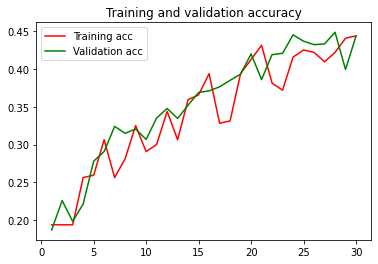

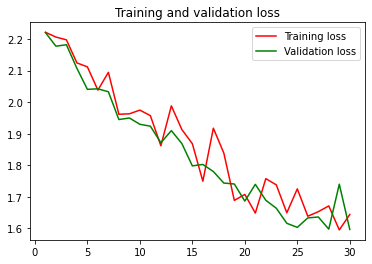

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()